# jitcsim tutorial

### Simulation of the Kuramoto model.
The parameter of the model is coupling.
The initial phase also could be changed in repeated simulations.
The output is plotting the time average of the Kuramoto order parameter vs coupling.

see also: example : 01_*.py


In [1]:
import numpy as np
import pylab as plt
from numpy import pi
import networkx as nx
from time import time
from numpy.random import uniform, normal
from jitcsim.visualization import plot_order
from jitcsim.models.kuramoto import Kuramoto_II

In [2]:
np.random.seed(1)

N = 50
num_ensembles = 10
alpha0 = 0.0
omega0 = normal(0, 0.1, N)
initial_state = uniform(-pi, pi, N)
adj = nx.to_numpy_array(nx.gnp_random_graph(N, 1, seed=1))

parameters = {
    'N': N,
    'adj': adj,
    't_initial': 0.,
    "t_final": 100,
    't_transition': 20.0,
    "interval": 1.0,                    # time interval for sampling

    "alpha": alpha0,
    "omega": omega0,
    'initial_state': initial_state,

    'integration_method': 'dopri5',
    'control': ['coupling'],
    "use_omp": False,
    "output": "data",
    "modulename": "km"                  # compiled filename
}


In [3]:
# make an instance of the model
sol = Kuramoto_II(parameters)
# compile model
# compile_time = time()
# sol.compile()
# print("Compile time : {:.3f} secondes.".format(time()-compile_time))

In [4]:
# define an array for the strength of couplings
couplings = np.arange(0, 0.8, 0.05) / (N-1)
orders = np.zeros((len(couplings), num_ensembles))

start_time = time()
# repeatedly run the model without recompiling the model.
for i in range(len(couplings)):
    for j in range(num_ensembles):

        controls = [couplings[i]]
        sol.set_initial_state(uniform(-pi, pi, N))
        data = sol.simulate(controls)
        x = data['x']
        t = data['t']
        orders[i, j] = np.mean(sol.order_parameter(x))

print("Simulation time: {:.3f} seconds".format(time()-start_time))

Simulation time: 8.411 seconds


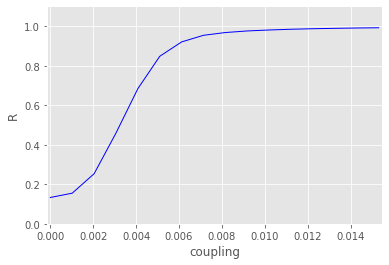

In [5]:
# plotting time average of the order parameters vs coupling
plot_order(couplings,
           np.mean(orders, axis=1),
           filename="data/kuramoto_II_r.png",
           ylabel="R", 
           xlabel="coupling",
           close_fig=False);